In [27]:
import pandas as pd 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt
import geopandas as gpd

In [38]:
df = pd.read_csv('static/files/SCR-GRC-hist_dep_surface_prod_cult_cer-A24.csv', encoding='ISO-8859-1', delimiter=';', decimal=',')
df['ESPECES'] = df['ESPECES'].str.rstrip()
df['DEP'] = df['DEP'].str.rstrip()
df = df[(df['ANNEE'] == 2024) & (df['ESPECES'] == 'Blé tendre')]
df = df[['DEP', 'CULT_SURF', 'CULT_REND', 'CULT_PROD']]
corsica = df[(df['DEP'] == '2A') | (df['DEP'] == '2B')]
corsicaSurf = corsica['CULT_SURF'].sum()
corsicaProd = corsica['CULT_PROD'].sum()
corsicaRend = corsica['CULT_REND'].mean()
newCorsica = pd.DataFrame({
    'DEP': ['20'],
    'CULT_SURF': [corsicaSurf],
    'CULT_REND': [corsicaRend],
    'CULT_PROD': [corsicaProd]
})
df = pd.concat([df, newCorsica]).reset_index(drop=True)
df = df[~df['DEP'].isin(['2A', '2B'])]
df['DEP'] = df['DEP'].astype(int)
departments = gpd.read_file('C:/Users/alexl/Documents/GitHub/Meteo/AromeAnomaly/geojsonfrance_corse_20.json')[['code', 'geometry']]
departments['code'] = departments['code'].astype(int)
final_df = departments.merge(df, how='left', left_on='code', right_on='DEP')
final_df['DEP'] = final_df['DEP'].fillna(final_df['code'])
final_df = final_df.fillna(0)
final_df['DEP'] = final_df['DEP'].astype(int)
final_df

,code,geometry,DEP,CULT_SURF,CULT_REND,CULT_PROD
0,2,"POLYGON ((3.1727 50.012, 3.1822 50.01234, 3.21...",2,162348.0,65.00,1055262.0
1,10,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",10,101300.0,60.00,607800.0
2,14,"POLYGON ((-1.11962 49.35557, -1.11503 49.3624,...",14,71990.0,76.97,554099.0
3,15,"POLYGON ((2.50841 45.4785, 2.52444 45.4807, 2....",15,4670.0,44.85,20945.0
4,28,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",28,136950.0,67.99,931184.0
...,...,...,...,...,...,...
90,53,"POLYGON ((-0.86036 48.50146, -0.84611 48.49828...",53,69668.0,60.99,424900.0
91,54,"MULTIPOLYGON (((5.45556 49.48093, 5.44953 49.4...",54,61600.0,57.00,351120.0
92,79,"POLYGON ((-0.89196 46.97582, -0.87973 46.9758,...",79,81370.0,55.00,447535.0
93,90,"POLYGON ((6.82353 47.81305, 6.83931 47.82478, ...",90,3000.0,58.00,17400.0


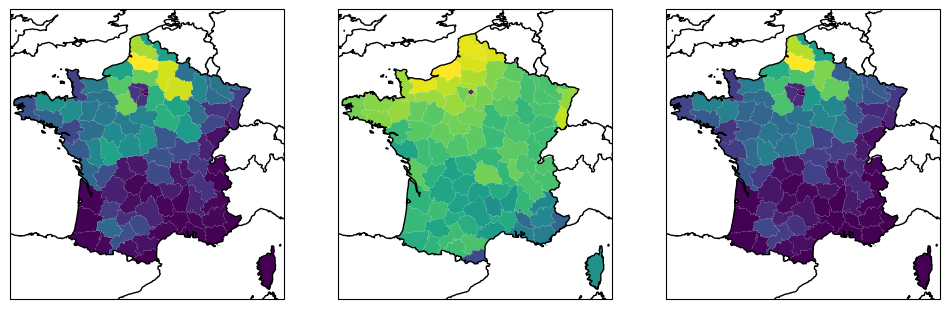

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(12, 7), subplot_kw={'projection': ccrs.PlateCarree()})
extent = [-5, 10, 41, 52]
for ax in axes:
        ax.set_extent(extent, crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS)
        
final_df.plot(column='CULT_SURF', ax=axes[0])
final_df.plot(column='CULT_REND', ax=axes[1])
final_df.plot(column='CULT_PROD', ax=axes[2])
plt.show()